# Project NBA Player - Models Analysis

Objective: to provide a classifier that can predict whether a player is worth investing in 
to invest in him because he will last more than 5 years in the NBA 
based on his sporting statistics.

## Importations

In [1]:
############ Usual Import ############
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

############ SKLearn ############
#Scalers
from sklearn.preprocessing import MinMaxScaler
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Metrics Classification
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.inspection import permutation_importance

############ Others ############
from test_precision import score_classifier_precision

%load_ext autoreload
%matplotlib inline

# Initial Data

## First Analysis

In [8]:
data = pd.read_csv("../data/nba_logreg.csv")
data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [9]:
data.dtypes

Name            object
GP               int64
MIN            float64
PTS            float64
FGM            float64
FGA            float64
FG%            float64
3P Made        float64
3PA            float64
3P%            float64
FTM            float64
FTA            float64
FT%            float64
OREB           float64
DREB           float64
REB            float64
AST            float64
STL            float64
BLK            float64
TOV            float64
TARGET_5Yrs    float64
dtype: object

In [10]:
data.shape

(1340, 21)

In [11]:
data.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [12]:
print(data.duplicated().sum(),"duplicates avant drop_dupli")
data = data.drop_duplicates()
print(data.duplicated().sum(),"duplicates après drop_dupli")

12 duplicates avant drop_dupli
0 duplicates après drop_dupli


In [13]:
data.reset_index(drop=True,inplace=True)

In [14]:
data.TARGET_5Yrs.value_counts(normalize=True) #Le jeu de donnée est déséquilibré


1.0    0.620482
0.0    0.379518
Name: TARGET_5Yrs, dtype: float64

In [15]:
####### Afin de le réquilibrer ########

# data_0 = data[data['TARGET_5Yrs']==0]
# data_1 = data[data['TARGET_5Yrs']==1].sample(504)
# data = pd.concat([data_0,data_1],axis=0).sample(frac=1)
# data

## Après analyse, le fait de réquilibrer le jeu de données diminue fortement les metrics
## On garde donc le jeu de données initial

On enlève en récupèrant la colonne de "Name" qui n'est pas intéressante pour notre analyse

In [16]:
names = data[['Name']] # players names
names.isna().sum() # Pas de Nan dans les noms

Name    0
dtype: int64

In [ ]:
y = data.TARGET_5Yrs.astype(int) # labels
y.value_counts(normalize=True)

# Un travail sur l'équilibre sera possiblement à effectuer, mais rien de trop déséquilibré
# Pas de Nan

1    0.620482
0    0.379518
Name: TARGET_5Yrs, dtype: float64

In [18]:
X = data.drop(columns=['TARGET_5Yrs','Name'])
X

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8
1324,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3
1325,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9
1326,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8


In [19]:
X.columns

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV'],
      dtype='object')

In [20]:
X.isna().sum()
X[['3P%']] = X[['3P%']].fillna(0.0)
X.isna().sum() #On a remplacé les nan de joueurs sans 3P réussis par 0

GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
dtype: int64

## Correlation matrix

We try to print a correlation_matrix in order to find maybe some interestign correlation in the dateset.

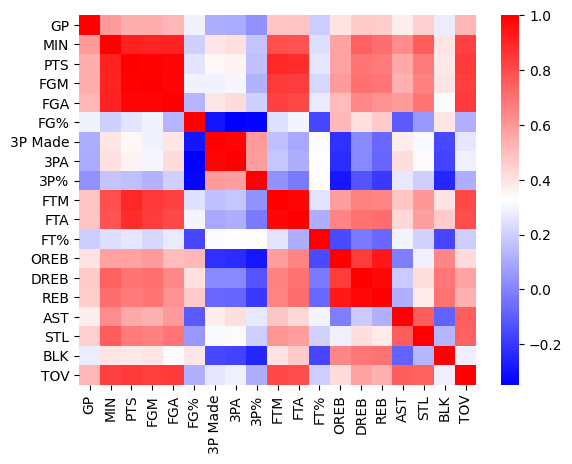

In [21]:
# Heatmap of pairwise correlations
correlation_matrix = X.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

# Preprocessing

## Scaling

In [23]:
# class CustomScaler(MinMaxScaler):
#     def __init__(self, col_names=None):
#         super().__init__()
#         if col_names is not None:
#             self.col_names = pd.Series(col_names)
#         else:
#             self.col_names = None

In [24]:
#On utilise un Min Max Scaler
rb_scaler = MinMaxScaler()
np_scaled = rb_scaler.fit_transform(X)
X_scaled = pd.DataFrame(np_scaled, columns=X.columns)
X_scaled

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,0.352113,0.642857,0.243636,0.232323,0.357895,0.218437,0.217391,0.323077,0.250,0.207792,0.225490,0.699,0.132075,0.340426,0.279412,0.179245,0.16,0.102564,0.279070
1,0.338028,0.629630,0.236364,0.171717,0.310526,0.116232,0.304348,0.430769,0.235,0.337662,0.333333,0.765,0.094340,0.191489,0.154412,0.349057,0.44,0.128205,0.348837
2,0.887324,0.322751,0.163636,0.171717,0.205263,0.368737,0.173913,0.261538,0.244,0.116883,0.127451,0.670,0.094340,0.159574,0.139706,0.094340,0.20,0.076923,0.209302
3,0.661972,0.224868,0.181818,0.202020,0.247368,0.376754,0.043478,0.076923,0.226,0.116883,0.127451,0.689,0.188679,0.074468,0.117647,0.075472,0.24,0.025641,0.209302
4,0.521127,0.222222,0.138182,0.131313,0.115789,0.573146,0.000000,0.015385,0.000,0.168831,0.186275,0.674,0.188679,0.138298,0.161765,0.028302,0.12,0.102564,0.162791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,0.971831,0.335979,0.130909,0.131313,0.147368,0.390782,0.000000,0.030769,0.143,0.155844,0.147059,0.792,0.075472,0.063830,0.066176,0.235849,0.24,0.051282,0.162791
1324,0.802817,0.251323,0.116364,0.121212,0.173684,0.240481,0.043478,0.107692,0.167,0.103896,0.098039,0.794,0.075472,0.095745,0.088235,0.216981,0.32,0.000000,0.279070
1325,0.450704,0.238095,0.170909,0.191919,0.163158,0.625251,0.000000,0.000000,0.000,0.129870,0.156863,0.643,0.283019,0.223404,0.257353,0.028302,0.12,0.102564,0.186047
1326,0.577465,0.235450,0.138182,0.141414,0.157895,0.402806,0.000000,0.030769,0.100,0.155844,0.176471,0.625,0.037736,0.021277,0.029412,0.207547,0.16,0.025641,0.162791


## Log Reg Analysis

In [25]:
log_reg = LogisticRegression(max_iter=10000)
score_classifier_precision(X_scaled.values,log_reg,y.values.ravel(),True)
#Pas ouf, recall largement inf à 0.825

[[264. 240.]
 [142. 682.]]
Precision= 0.7392574577642866


0.7392574577642866

In [26]:
##### Première Grid Search #####
# Instantiate model
model = LogisticRegression(max_iter=1000)

# Hyperparameter Grid
grid = {
    'penalty':['l1','l2','elasticnet'],
    'solver':['lbfgs','sag','saga','newton-cg', 'lbfgs', 'liblinear'],
    'l1_ratio': [0.01,0.1,1,10],
    'C' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
}

# Instantiate Grid Search
search = GridSearchCV(
    model,
    grid,
    scoring ="f1", #On cherche à trouver le plus optimal entre recall et precision, pour ensuite macimiser la precision
    cv = 7,
    n_jobs=-1
)

# Fit data to Grid Search
search.fit(X_scaled, y);

/Users/arthurdubs/.pyenv/versions/3.10.6/envs/interviews/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/arthurdubs/.pyenv/versions/3.10.6/envs/interviews/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/arthurdubs/.pyenv/versions/3.10.6/envs/interviews/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/arthurdubs/.pyenv/versions/3.10.6/envs/interviews/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/arthurdubs/.pyenv/versions/3.10.6/envs/interviews/lib

In [27]:
# Best score
print("score",search.best_score_)

# Best Params
print("params",search.best_params_)

score 0.781764542262218
params {'C': 1, 'l1_ratio': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
##### Deuxième Grid Search #####
# Instantiate model
model = LogisticRegression(max_iter=1000,penalty='l2',solver='lbfgs',)

# Hyperparameter Grid
grid = {
    'C' : np.linspace(0.1,10,50)
}

# Instantiate Grid Search
search = GridSearchCV(
    model,
    grid,
    scoring ="f1", #On cherche à trouver le plus optimal entre recall et precision, pour ensuite macimiser la precision
    cv = 7,
    n_jobs=-1
)

# Fit data to Grid Search
search.fit(X_scaled, y);

In [ ]:
# Best score
print("score",search.best_score_)

# Best Params
print("params",search.best_params_)

score 0.781764542262218
params {'C': 0.9081632653061225}


## KNN Classifier Analysis

#### Learning Curves

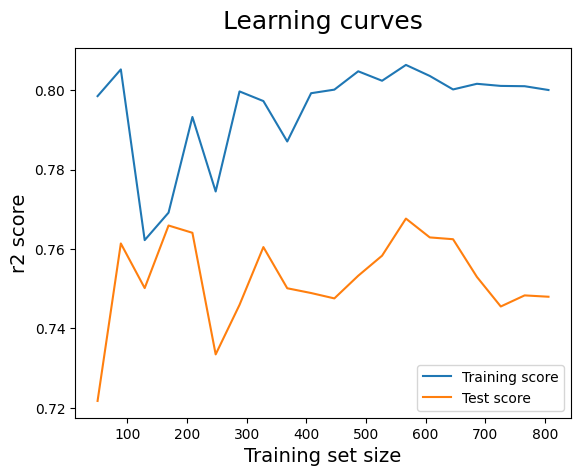

In [28]:
train_sizes = np.linspace(50,806,20,dtype=int)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=KNeighborsClassifier(n_neighbors=10), X=X_scaled, y=y, train_sizes=train_sizes, cv=5,scoring='precision')

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

### Finding the best n_neigh

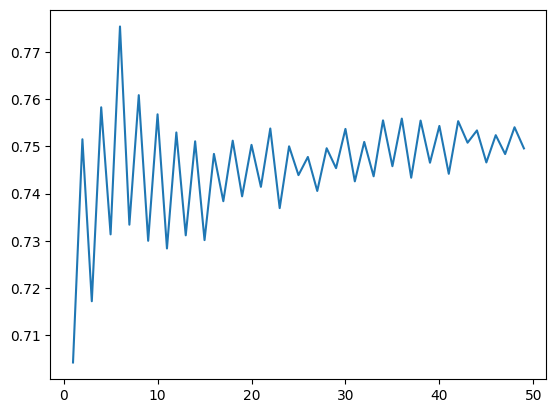

In [ ]:
#On recherche le n_neigh optimal
n_neigh = [k for k in range(1,50)]
precision = []
for k in n_neigh:
    KNN_Class = KNeighborsClassifier(n_neighbors=k)
    precision.append(score_classifier_precision(X_scaled.values,KNN_Class,y.values.ravel()))

plt.plot(n_neigh,precision);

In [ ]:
KNN_Class = KNeighborsClassifier(n_neighbors=8)
score_classifier_precision(X_scaled.values,KNN_Class,y.values.ravel(),True)

[[316. 188.]
 [225. 599.]]
Precision= 0.7608121620242833


0.7608121620242833

### GridSearch

In [29]:
# Instantiate model
model = KNeighborsClassifier()

# Hyperparameter Grid
grid = {
    'n_neighbors': [k for k in range(1,50)]
}

# Instantiate Grid Search
search = GridSearchCV(
    model,
    grid,
    scoring = 'f1',
    cv = 7,
    n_jobs=-1# parallelize computation
)

# Fit data to Grid Search
search.fit(X_scaled, y);

In [30]:
# Best score
print("score",search.best_score_)

# Best Params
print("params",search.best_params_)

score 0.76374829483082
params {'n_neighbors': 49}


#### Final

In [32]:
KNN_Class = KNeighborsClassifier(n_neighbors=8)
score_classifier_precision(X_scaled.values,KNN_Class,y.values.ravel(),True)

[[316. 188.]
 [225. 599.]]
Precision= 0.7608121620242833


0.7608121620242833

## SVC Analysis

### Learning Curves

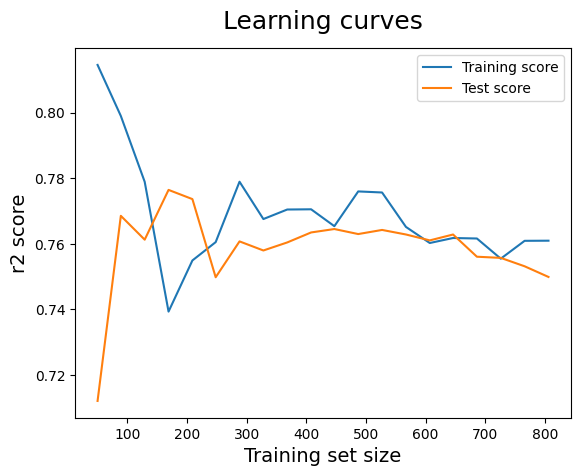

In [33]:
train_sizes = np.linspace(50,806,20,dtype=int)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=SVC(), X=X_scaled, y=y, train_sizes=train_sizes, cv=5,scoring='precision')

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend();

### GridSearch

In [32]:
# Instantiate model
model = SVC()

# Hyperparameter Grid
grid = {
    'kernel': ["linear", "poly", "rbf", "sigmoid"],
    'degree':[3,4,5,6],
    "C":[0.1,1,10]
}

# Instantiate Grid Search
search = GridSearchCV(
    model,
    grid,
    scoring = 'f1',
    cv = 7,
    n_jobs=-1# parallelize computation
)

# Fit data to Grid Search
search.fit(X_scaled, y);

In [33]:
# Best score
print("score",search.best_score_)

# Best Params
print("params",search.best_params_)

score 0.7794443350408675
params {'C': 0.1, 'degree': 3, 'kernel': 'linear'}


In [34]:
# Instantiate model
model = SVC(kernel='poly',degree=5)

# Hyperparameter Grid
grid = {
    "C":[0.001,0.005,0.01,0.05],
    'degree':[5,6,7,8,9,10,11,12]
}

# Instantiate Grid Search
search = GridSearchCV(
    model,
    grid,
    scoring = 'f1',
    cv = 7,
    n_jobs=-1 # parallelize computation
)

# Fit data to Grid Search
search.fit(X_scaled, y);

In [35]:
# Best score
print("score",search.best_score_)

# Best Params
print("params",search.best_params_)

score 0.7410425957797112
params {'C': 0.001, 'degree': 5}


#### Final - sans feature supp

In [38]:
SVC_Classi = SVC(kernel='poly',degree=10,C= 0.0001)
score_classifier_precision(X_scaled.values,SVC_Classi,y.values.ravel(),True)

[[259. 245.]
 [280. 544.]]
Precision= 0.7408013486899797


0.7408013486899797

#### Final - avec feature supp (Gain 0.02)

In [39]:
# Fit model
svc_model = SVC(kernel='poly',degree=10,C= 0.001).fit(X_scaled, y)

# Performs Permutation
permutation_score = permutation_importance(svc_model,
                                           X_scaled, y,
                                           n_repeats=30,
                                           scoring='precision',
                                           n_jobs=-1
                                           )

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T)

importance_df.columns=['feature','score_decrease']

# Show the important features
importance_df.sort_values(by="score_decrease", ascending =False)

,feature,score_decrease
0,GP,0.108868
10,FTA,0.038565
1,MIN,0.037289
4,FGA,0.036809
6,3P Made,0.030267
2,PTS,0.027508
5,FG%,0.026872
18,TOV,0.026688
9,FTM,0.025572
16,STL,0.024934


In [40]:
features_to_drop = ['MIN','STL','FT%','3PA']
features_to_drop

['MIN', 'STL', 'FT%', '3PA']

In [41]:
SVC_opti = SVC(kernel='poly',degree=10,C= 0.001)
score_classifier_precision(X_scaled.drop(columns=features_to_drop).values,SVC_Classi,y.values.ravel(),True)

[[271. 233.]
 [292. 532.]]
Precision= 0.7573052003892498


0.7573052003892498

#### test validation SVC

In [42]:
# test = {'GP'         : 58,
#     'MIN'        : 11.6,
#     'PTS'        : 5.7,
#     'FGM'        : 2.3,
#     'FGA'        : 5.5,
#     'FGp'        : 42.6,
#     'troisP_Made'    : 0.1,
#     'troisPA'        : 0.5,
#     'troisPp'        : 22.6,
#     'FTM'        : 0.4,
#     'FTA'        : 1.3,
#     'FTp'        : 68.9,
#     'OREB'       : 1.0,
#     'DREB'       : 0.9,
#     'REB'        : 1.9,
#     'AST'        : 0.8,
#     'STL'        : 0.6,
#     'BLK'        : 0.1,
#     'TOV'        : 1}

# X_new_player = pd.DataFrame(dict(test, index=[0])).set_index('index')
# X_new_player.columns = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM',
#        'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV']
# X_new_player

In [43]:
data[data['TARGET_5Yrs']==1.0]

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
6,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,50.0,...,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1.0
7,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,30.0,...,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1.0
11,Sam Mack,40,6.7,3.6,1.2,3.0,39.8,0.1,0.6,13.6,...,1.5,77.6,0.5,0.8,1.2,0.4,0.3,0.1,0.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,Lee Mayberry,82,18.3,5.2,2.1,4.6,45.6,0.5,1.3,39.1,...,0.8,57.4,0.3,1.1,1.4,3.3,0.7,0.1,1.0,1.0
1321,Hubert Davis,50,16.3,5.4,2.2,5.0,43.8,0.1,0.4,31.6,...,1.1,79.6,0.3,0.9,1.1,1.7,0.4,0.1,0.9,1.0
1324,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1326,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


In [44]:
y.loc[[445]]

445    1
Name: TARGET_5Yrs, dtype: int64

In [45]:
X_new_player = X.loc[[445]]
X_new_player

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
445,82,20.0,4.4,1.8,3.0,59.5,0.0,0.0,0.0,0.9,1.4,61.4,2.1,3.8,5.9,0.8,0.8,0.1,0.6


In [46]:
rb_scaler = MinMaxScaler()
X_scaled = rb_scaler.fit_transform(X)

SVC_opti = SVC(kernel='poly',degree=5,C= 0.005)
SVC_opti.fit(X_scaled,y)

X_new_player_scaled = rb_scaler.transform(X_new_player)
X_new_player_scaled

array([[1.        , 0.44708995, 0.13454545, 0.15151515, 0.11578947,
        0.71543086, 0.        , 0.        , 0.        , 0.11688312,
        0.1372549 , 0.614     , 0.39622642, 0.38297872, 0.41176471,
        0.0754717 , 0.32      , 0.02564103, 0.11627907]])

In [47]:
SVC_opti.predict(X_new_player_scaled)

array([1])

In [48]:
rb_scaler = MinMaxScaler()
np_scaled = rb_scaler.fit_transform(X)
X_scaled = pd.DataFrame(np_scaled, columns=X.columns)
X_scaled

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,0.352113,0.642857,0.243636,0.232323,0.357895,0.218437,0.217391,0.323077,0.250,0.207792,0.225490,0.699,0.132075,0.340426,0.279412,0.179245,0.16,0.102564,0.279070
1,0.338028,0.629630,0.236364,0.171717,0.310526,0.116232,0.304348,0.430769,0.235,0.337662,0.333333,0.765,0.094340,0.191489,0.154412,0.349057,0.44,0.128205,0.348837
2,0.887324,0.322751,0.163636,0.171717,0.205263,0.368737,0.173913,0.261538,0.244,0.116883,0.127451,0.670,0.094340,0.159574,0.139706,0.094340,0.20,0.076923,0.209302
3,0.661972,0.224868,0.181818,0.202020,0.247368,0.376754,0.043478,0.076923,0.226,0.116883,0.127451,0.689,0.188679,0.074468,0.117647,0.075472,0.24,0.025641,0.209302
4,0.521127,0.222222,0.138182,0.131313,0.115789,0.573146,0.000000,0.015385,0.000,0.168831,0.186275,0.674,0.188679,0.138298,0.161765,0.028302,0.12,0.102564,0.162791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,0.971831,0.335979,0.130909,0.131313,0.147368,0.390782,0.000000,0.030769,0.143,0.155844,0.147059,0.792,0.075472,0.063830,0.066176,0.235849,0.24,0.051282,0.162791
1324,0.802817,0.251323,0.116364,0.121212,0.173684,0.240481,0.043478,0.107692,0.167,0.103896,0.098039,0.794,0.075472,0.095745,0.088235,0.216981,0.32,0.000000,0.279070
1325,0.450704,0.238095,0.170909,0.191919,0.163158,0.625251,0.000000,0.000000,0.000,0.129870,0.156863,0.643,0.283019,0.223404,0.257353,0.028302,0.12,0.102564,0.186047
1326,0.577465,0.235450,0.138182,0.141414,0.157895,0.402806,0.000000,0.030769,0.100,0.155844,0.176471,0.625,0.037736,0.021277,0.029412,0.207547,0.16,0.025641,0.162791


In [49]:
SVC_opti = SVC(kernel='poly',degree=5,C= 0.005)
score_classifier_precision(X_scaled.drop(columns=features_to_drop).values,SVC_Classi,y.values.ravel(),True)

[[271. 233.]
 [292. 532.]]
Precision= 0.7573052003892498


0.7573052003892498

# Comparison between models

In [50]:
# We worked with the scaled data (MinMaxScaler)
rb_scaler = MinMaxScaler()
np_scaled = rb_scaler.fit_transform(X)
X_scaled = pd.DataFrame(np_scaled, columns=X.columns)
X_scaled

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,0.352113,0.642857,0.243636,0.232323,0.357895,0.218437,0.217391,0.323077,0.250,0.207792,0.225490,0.699,0.132075,0.340426,0.279412,0.179245,0.16,0.102564,0.279070
1,0.338028,0.629630,0.236364,0.171717,0.310526,0.116232,0.304348,0.430769,0.235,0.337662,0.333333,0.765,0.094340,0.191489,0.154412,0.349057,0.44,0.128205,0.348837
2,0.887324,0.322751,0.163636,0.171717,0.205263,0.368737,0.173913,0.261538,0.244,0.116883,0.127451,0.670,0.094340,0.159574,0.139706,0.094340,0.20,0.076923,0.209302
3,0.661972,0.224868,0.181818,0.202020,0.247368,0.376754,0.043478,0.076923,0.226,0.116883,0.127451,0.689,0.188679,0.074468,0.117647,0.075472,0.24,0.025641,0.209302
4,0.521127,0.222222,0.138182,0.131313,0.115789,0.573146,0.000000,0.015385,0.000,0.168831,0.186275,0.674,0.188679,0.138298,0.161765,0.028302,0.12,0.102564,0.162791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,0.971831,0.335979,0.130909,0.131313,0.147368,0.390782,0.000000,0.030769,0.143,0.155844,0.147059,0.792,0.075472,0.063830,0.066176,0.235849,0.24,0.051282,0.162791
1324,0.802817,0.251323,0.116364,0.121212,0.173684,0.240481,0.043478,0.107692,0.167,0.103896,0.098039,0.794,0.075472,0.095745,0.088235,0.216981,0.32,0.000000,0.279070
1325,0.450704,0.238095,0.170909,0.191919,0.163158,0.625251,0.000000,0.000000,0.000,0.129870,0.156863,0.643,0.283019,0.223404,0.257353,0.028302,0.12,0.102564,0.186047
1326,0.577465,0.235450,0.138182,0.141414,0.157895,0.402806,0.000000,0.030769,0.100,0.155844,0.176471,0.625,0.037736,0.021277,0.029412,0.207547,0.16,0.025641,0.162791


A cross-validation (cv=5) is performed on all 3 models optimised in turn to determine which seems the most relevant.   
Cross validation minimises the bias due to train_test_split in the data.

In [51]:
#SVC
SVC_opti = SVC(kernel='poly',degree=5,C= 0.01)
cv_result = cross_validate(SVC_opti,X_scaled,y,cv=5,scoring=['accuracy','precision','recall','f1'])
cv_result
print("Accuracy=",cv_result['test_accuracy'].mean())
print("Precision=",cv_result['test_precision'].mean())
print("Recall=",cv_result['test_recall'].mean())
print("F1=",cv_result['test_f1'].mean())

Accuracy= 0.6739452404596398
Precision= 0.7804170399171884
Recall= 0.6602069475240206
F1= 0.7130599844609913


In [52]:
#KNN
KNN_opti = KNeighborsClassifier(n_neighbors=7)
cv_result = cross_validate(KNN_opti,X_scaled,y,cv=5,scoring=['accuracy','precision','recall','f1'])
cv_result
print("Accuracy=",cv_result['test_accuracy'].mean())
print("Precision=",cv_result['test_precision'].mean())
print("Recall=",cv_result['test_recall'].mean())
print("F1=",cv_result['test_f1'].mean())

Accuracy= 0.6664122570577387
Precision= 0.7430447836235852
Recall= 0.705129342202513
F1= 0.7222432593945601


In [53]:
LogReg_classi = LogisticRegression(max_iter=1000)
cv_result = cross_validate(LogReg_classi,X_scaled,y,cv=5,scoring=['accuracy','precision','recall','f1'])

print("Accuracy=",cv_result['test_accuracy'].mean())
print("Precision=",cv_result['test_precision'].mean())
print("Recall=",cv_result['test_recall'].mean())
print("F1=",cv_result['test_f1'].mean())

Accuracy= 0.7085657540076606
Precision= 0.7403296230283133
Recall= 0.8179379157427938
F1= 0.7766206592323581


In [54]:
LogReg_opti = LogisticRegression(max_iter=1000,penalty='l2',solver='lbfgs',C=0.9081632653061225)
cv_result = cross_validate(LogReg_opti,X_scaled,y,cv=5,scoring=['accuracy','precision','recall','f1'])

print("Accuracy=",cv_result['test_accuracy'].mean())
print("Precision=",cv_result['test_precision'].mean())
print("Recall=",cv_result['test_recall'].mean())
print("F1=",cv_result['test_f1'].mean())

Accuracy= 0.7078138743084125
Precision= 0.7395193099528069
Recall= 0.8179379157427938
F1= 0.7761783370408526


# Conclusion

We can see that even after Gridsearch, the Log reg inital model is good. So we're going to keep it    
We make the following changes to the second NoteBook